In [35]:
null=sc.read("../processed_data/11.27_gene_null/3.8_gene_test.h5ad")
null.X=null.layers["count"]
null= null[null.obs["random_sample"].isin(range(0, 6)) | null.obs["random_sample"].isin(range(25, 30))]
del null.obsm["X_diffmap"]
nulldata = milo2.load(null)
sc.pp.neighbors(nulldata['rna'], use_rep='X_scANVI', n_neighbors=80, n_pcs=15)
milo2.make_nhoods(nulldata['rna'], prop=0.03)
nulldata = milo2.count_nhoods(null, sample_col="random_sample")
pseudobulk=milo2.make_pseudobulk_parallel(mdata=nulldata,sample_col="random_sample",group_col="Group",time_col="time",njob=-1,min_cell=2)
deg=milo2.da_expression(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,fix_libsize=True)
deg=milo2.makeSPFDR(mdata=nulldata,njob=-1)
null_test=milo2.makeShuffleDA(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,times=4,fix_libsize=True)
milo2.make_range_gene(mdata=nulldata,FDR_threshold=0.05,time_col="time")
milo2.da_expression_overall(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",fix_libsize=True)
test=milo2.test_whole_gene(nulldata)
milo2.permute_point_gene(nulldata)
milo2.test_gene_binom(nulldata)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
100%|██████████| 603/603 [00:22<00:00, 26.49it/s]


Using edgeR to find DEG......

 12%|█▏        | 72/603 [00:08<00:59,  8.94it/s]R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/loca

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 671.19it/s]


working on 0 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:02<00:00,  9.69it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 611.64it/s]


working on 1 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:02<00:00,  9.72it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 625.37it/s]


working on 2 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:04<00:00,  9.36it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 630.07it/s]


working on 3 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:01<00:00,  9.86it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 645.49it/s]
R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (

In [40]:
pseudobulk_v13=pseudobulk

In [39]:
np.sum(pseudobulk.var<0.05)

overall_gene_p    156
dtype: int64

In [59]:
null=sc.read("../processed_data/11.27_gene_null/3.8_gene_test_v14.h5ad")
null.X=null.layers["count"]
null= null[null.obs["random_sample"].isin(range(0, 6)) | null.obs["random_sample"].isin(range(25, 30))]
del null.obsm["X_diffmap"]
nulldata = milo2.load(null)
sc.pp.neighbors(nulldata['rna'], use_rep='X_scANVI', n_neighbors=80, n_pcs=15)
milo2.make_nhoods(nulldata['rna'], prop=0.03)
nulldata = milo2.count_nhoods(null, sample_col="random_sample")
pseudobulk=milo2.make_pseudobulk_parallel(mdata=nulldata,sample_col="random_sample",group_col="Group",time_col="time",njob=-1,min_cell=2)
deg=milo2.da_expression(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,fix_libsize=True)
deg=milo2.makeSPFDR(mdata=nulldata,njob=-1)
null_test=milo2.makeShuffleDA(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,times=4,fix_libsize=True)
milo2.make_range_gene(mdata=nulldata,FDR_threshold=0.05,time_col="time")
milo2.da_expression_overall(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",fix_libsize=True)
test=milo2.test_whole_gene(nulldata)
milo2.permute_point_gene(nulldata)
milo2.test_gene_binom(nulldata)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
100%|██████████| 603/603 [00:23<00:00, 25.41it/s]


Using edgeR to find DEG......

 12%|█▏        | 72/603 [00:08<01:01,  8.64it/s]R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/loca

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 655.32it/s]


working on 0 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:01<00:00,  9.73it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 749.13it/s]


working on 1 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:03<00:00,  9.48it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 587.86it/s]


working on 2 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:04<00:00,  9.39it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 611.96it/s]


working on 3 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:02<00:00,  9.66it/s]


Making FDR

add spatial FDR......

100%|██████████| 158/158 [00:00<00:00, 696.62it/s]


In [60]:
np.sum(pseudobulk.var<0.05)

overall_gene_p    92
dtype: int64

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to cons

In [44]:
null=sc.read("../processed_data/11.27_gene_null/3.7_null_shuffle_model_mean_finely_v10.h5ad")
null.X=null.layers["count"]
null= null[null.obs["random_sample"].isin(range(0, 6)) | null.obs["random_sample"].isin(range(25, 30))]
del null.obsm["X_diffmap"]
nulldata = milo2.load(null)
sc.pp.neighbors(nulldata['rna'], use_rep='X_scANVI', n_neighbors=80, n_pcs=15)
milo2.make_nhoods(nulldata['rna'], prop=0.03)
nulldata = milo2.count_nhoods(null, sample_col="random_sample")
pseudobulk=milo2.make_pseudobulk_parallel(mdata=nulldata,sample_col="random_sample",group_col="Group",time_col="time",njob=-1,min_cell=2)
deg=milo2.da_expression(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,fix_libsize=True)
deg=milo2.makeSPFDR(mdata=nulldata,njob=-1)
null_test=milo2.makeShuffleDA(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",njob=-1,times=2,fix_libsize=True)
milo2.make_range_gene(mdata=nulldata,FDR_threshold=0.05,time_col="time")
milo2.da_expression_overall(nulldata,design="~Group",model_contrasts="GroupGroup1-GroupGroup2",fix_libsize=True)
test=milo2.test_whole_gene(nulldata)
milo2.permute_point_gene(nulldata)
milo2.test_gene_binom(nulldata)

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
100%|██████████| 603/603 [00:22<00:00, 26.42it/s]


Using edgeR to find DEG......

 12%|█▏        | 72/603 [00:08<01:00,  8.81it/s]R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’里没有程辑包

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  图书馆‘/usr/loca

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 3971.54it/s]


working on 0 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:02<00:00,  9.63it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 3962.46it/s]


working on 1 times

Using edgeR to find DEG......

100%|██████████| 603/603 [01:00<00:00,  9.90it/s]


Making FDR

add spatial FDR......

100%|██████████| 100/100 [00:00<00:00, 4297.93it/s]


In [49]:
pseudobulk

AnnData object with n_obs × n_vars = 6030 × 100
    obs: 'random_sample', 'Group', 'time', 'nhoods_index'
    var: 'overall_gene_p'
    uns: 'sample_col', 'group_col', 'time_col', 'var1', 'var2', 'shuffle_times', 'sum'
    varm: 'PValue', 'logFC', 'logCPM', 'FDR', 'F', 'GroupGroup1', 'GroupGroup2', 'SPFDR', 'null_mean', 'edgeR_overall', 'nullPoint', 'truePoint', 'exprPoint', 'group1_cpm', 'group2_cpm', 'gene_p_adj'

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to cons

In [50]:
pseudobulk.var[60:100]

,overall_gene_p
60,0.002539
61,0.002539
62,0.002539
63,0.002539
64,0.002539
65,0.002539
66,0.002539
67,0.002539
68,0.013103
69,0.013103


In [51]:
exprMatrix=pseudobulk.varm["exprPoint"]

In [54]:
pseudobulk

AnnData object with n_obs × n_vars = 6030 × 100
    obs: 'random_sample', 'Group', 'time', 'nhoods_index'
    var: 'overall_gene_p'
    uns: 'sample_col', 'group_col', 'time_col', 'var1', 'var2', 'shuffle_times', 'sum'
    varm: 'PValue', 'logFC', 'logCPM', 'FDR', 'F', 'GroupGroup1', 'GroupGroup2', 'SPFDR', 'null_mean', 'edgeR_overall', 'nullPoint', 'truePoint', 'exprPoint', 'group1_cpm', 'group2_cpm', 'gene_p_adj'

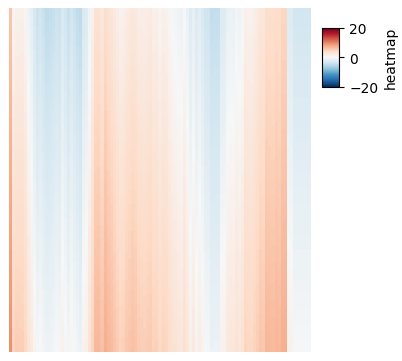

In [56]:
plt.figure(figsize=(4, 4))
cm = PyComplexHeatmap.ClusterMapPlotter(data=exprMatrix,
                       col_cluster=False,row_cluster=False,
                       show_rownames=False,show_colnames=False,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='RdBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'},vmax=20,vmin=-20)

In [57]:
fdr_matrix=pseudobulk.varm["gene_p_adj"]
fdr_matrix=-np.log(fdr_matrix+0.000000001)

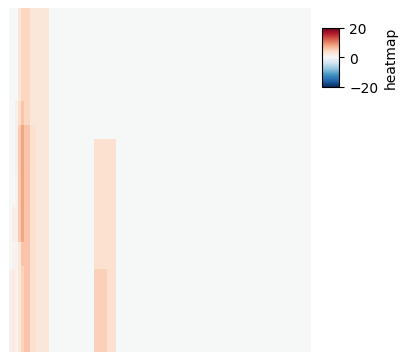

In [58]:
plt.figure(figsize=(4, 4))
cm = PyComplexHeatmap.ClusterMapPlotter(data=fdr_matrix,
                       col_cluster=False,row_cluster=False,
                       show_rownames=False,show_colnames=False,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='RdBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'},vmax=20,vmin=-20)

In [71]:
pseudobulk.var.to_csv("../processed_data/11.27_gene_null/3.9_static/test_trajdiff_v8.csv")